In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load Dataset

In [56]:
# Load the dataset
data = pd.read_csv('day.csv')

# Display the first few rows of the dataset
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [57]:
data.shape

(730, 16)

## Next, let's perform some basic data checks and exploratory analysis:

- Check for missing values.
- Summarize the numerical variables.
- Convert categorical variables into their respective categories.

In [58]:
# Check for missing values
missing_values = data.isnull().sum()

# Summary statistics for numerical variables
summary_stats = data.describe()

missing_values, summary_stats

(instant       0
 dteday        0
 season        0
 yr            0
 mnth          0
 holiday       0
 weekday       0
 workingday    0
 weathersit    0
 temp          0
 atemp         0
 hum           0
 windspeed     0
 casual        0
 registered    0
 cnt           0
 dtype: int64,
           instant      season          yr        mnth     holiday     weekday  \
 count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
 mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.997260   
 std    210.877136    1.110184    0.500343    3.450215    0.167266    2.006161   
 min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
 25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
 50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
 75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
 max    730.000000    4.000000    1.000000   12.000000   

Next, let's convert the categorical variables (season, weathersit, etc.) into their respective string labels for better interpretability.

In [59]:
# Mapping for categorical variables
season_mapping = {1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'}
weathersit_mapping = {1: 'clear', 2: 'mist', 3: 'light_snow/rain', 4: 'heavy_rain/snow'}
year_mapping = {0: '2018', 1: '2019'}

# Applying the mappings
data['season'] = data['season'].map(season_mapping)
data['weathersit'] = data['weathersit'].map(weathersit_mapping)
data['yr'] = data['yr'].map(year_mapping)

data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,2018,1,0,6,0,mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,2018,1,0,0,0,mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,2018,1,0,1,1,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,2018,1,0,2,1,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,2018,1,0,3,1,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Next, let's perform some exploratory data analysis (EDA) to visualize and understand the relationships between the variables and the target variable (cnt).

## Exploratory Data Analysis (EDA)
- Distribution of the target variable (cnt).
- Relationships between cnt and numerical variables (temp, atemp, hum, windspeed).
- Relationships between cnt and categorical variables (season, yr, mnth, holiday, weekday, workingday, weathersit).

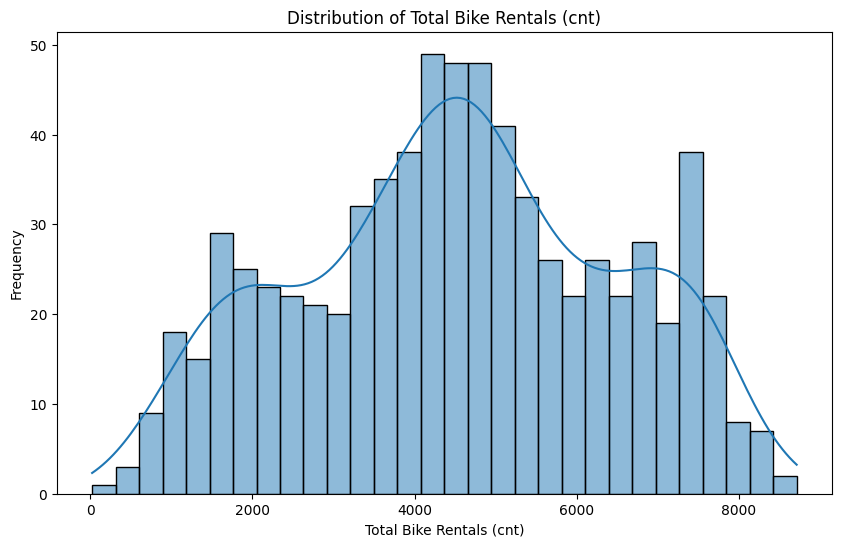

In [60]:
# Distribution of the target variable
plt.figure(figsize=(10, 6))
sns.histplot(data['cnt'], kde=True, bins=30)
plt.title('Distribution of Total Bike Rentals (cnt)')
plt.xlabel('Total Bike Rentals (cnt)')
plt.ylabel('Frequency')
plt.show()

The distribution of the total bike rentals (cnt) appears to be right-skewed, indicating that there are more days with a lower number of bike rentals and fewer days with a very high number of rentals.

Next, let's examine the relationships between cnt and the numerical variables (temp, atemp, hum, windspeed).

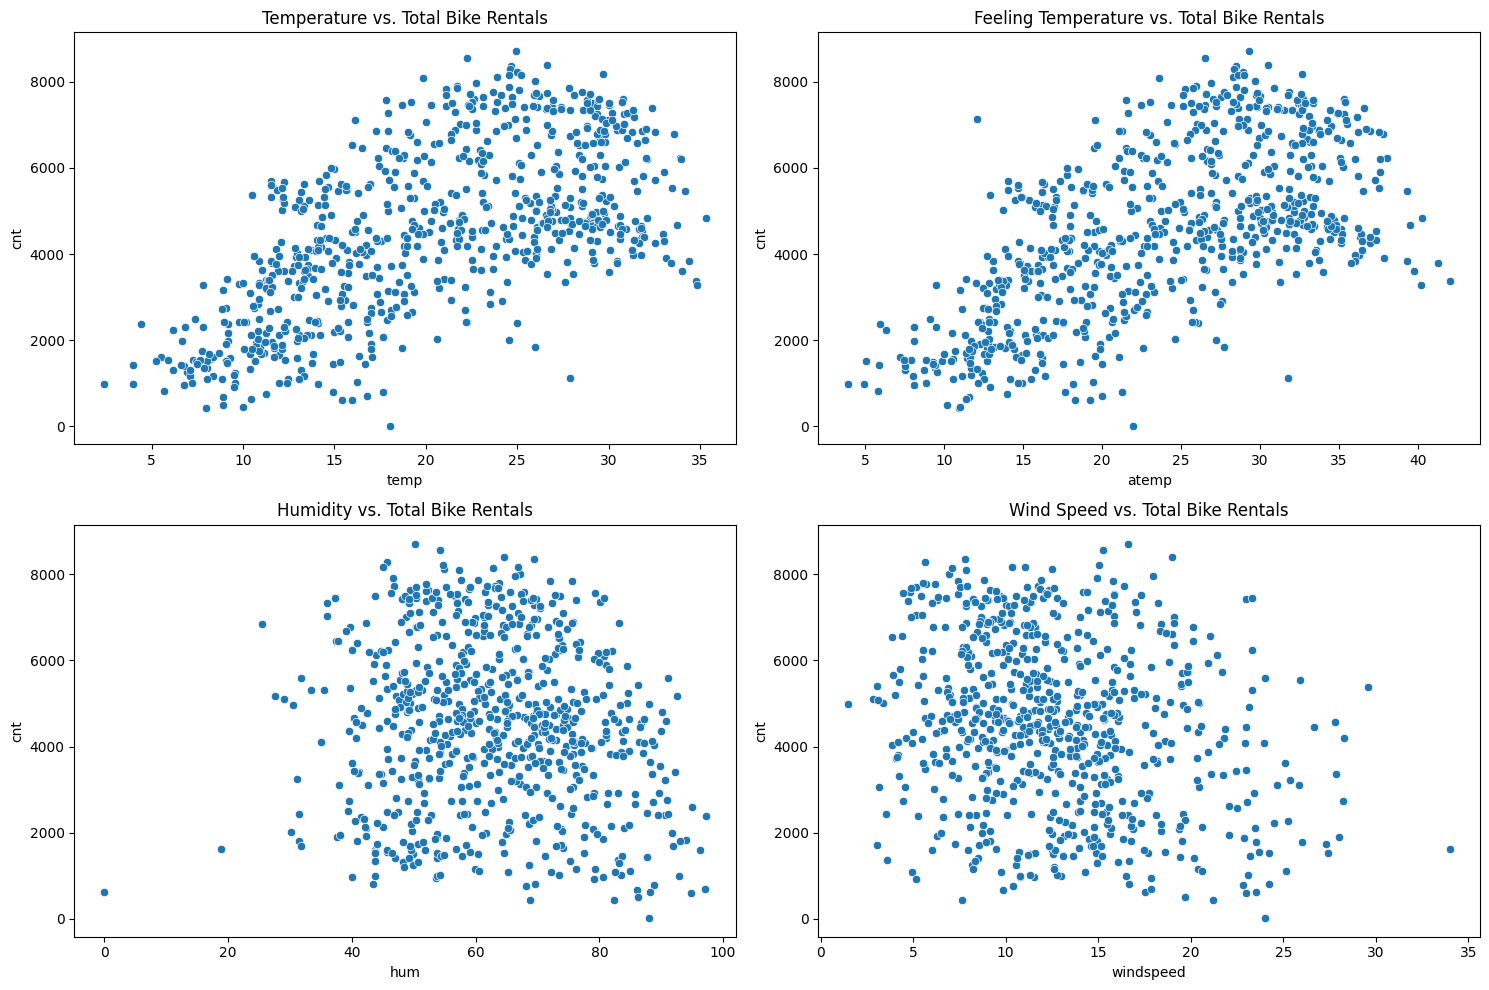

In [61]:
# Scatter plots to examine relationships with numerical variables
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sns.scatterplot(ax=axes[0, 0], x='temp', y='cnt', data=data)
axes[0, 0].set_title('Temperature vs. Total Bike Rentals')

sns.scatterplot(ax=axes[0, 1], x='atemp', y='cnt', data=data)
axes[0, 1].set_title('Feeling Temperature vs. Total Bike Rentals')

sns.scatterplot(ax=axes[1, 0], x='hum', y='cnt', data=data)
axes[1, 0].set_title('Humidity vs. Total Bike Rentals')

sns.scatterplot(ax=axes[1, 1], x='windspeed', y='cnt', data=data)
axes[1, 1].set_title('Wind Speed vs. Total Bike Rentals')

plt.tight_layout()
plt.show()

From the scatter plots, we can observe the following:

- **Temperature and Feeling Temperature**: Both temp and atemp show a positive relationship with cnt. As the temperature increases, the number of bike rentals tends to increase.
- **Humidity**: There is no clear linear relationship between hum and cnt, but it appears that extreme humidity levels might slightly reduce bike rentals.
- **Wind Speed**: There is a slight negative relationship between windspeed and cnt, indicating that higher wind speeds may reduce bike rentals.

Next, let's explore the relationships between cnt and the categorical variables (season, yr, mnth, holiday, weekday, workingday, weathersit).

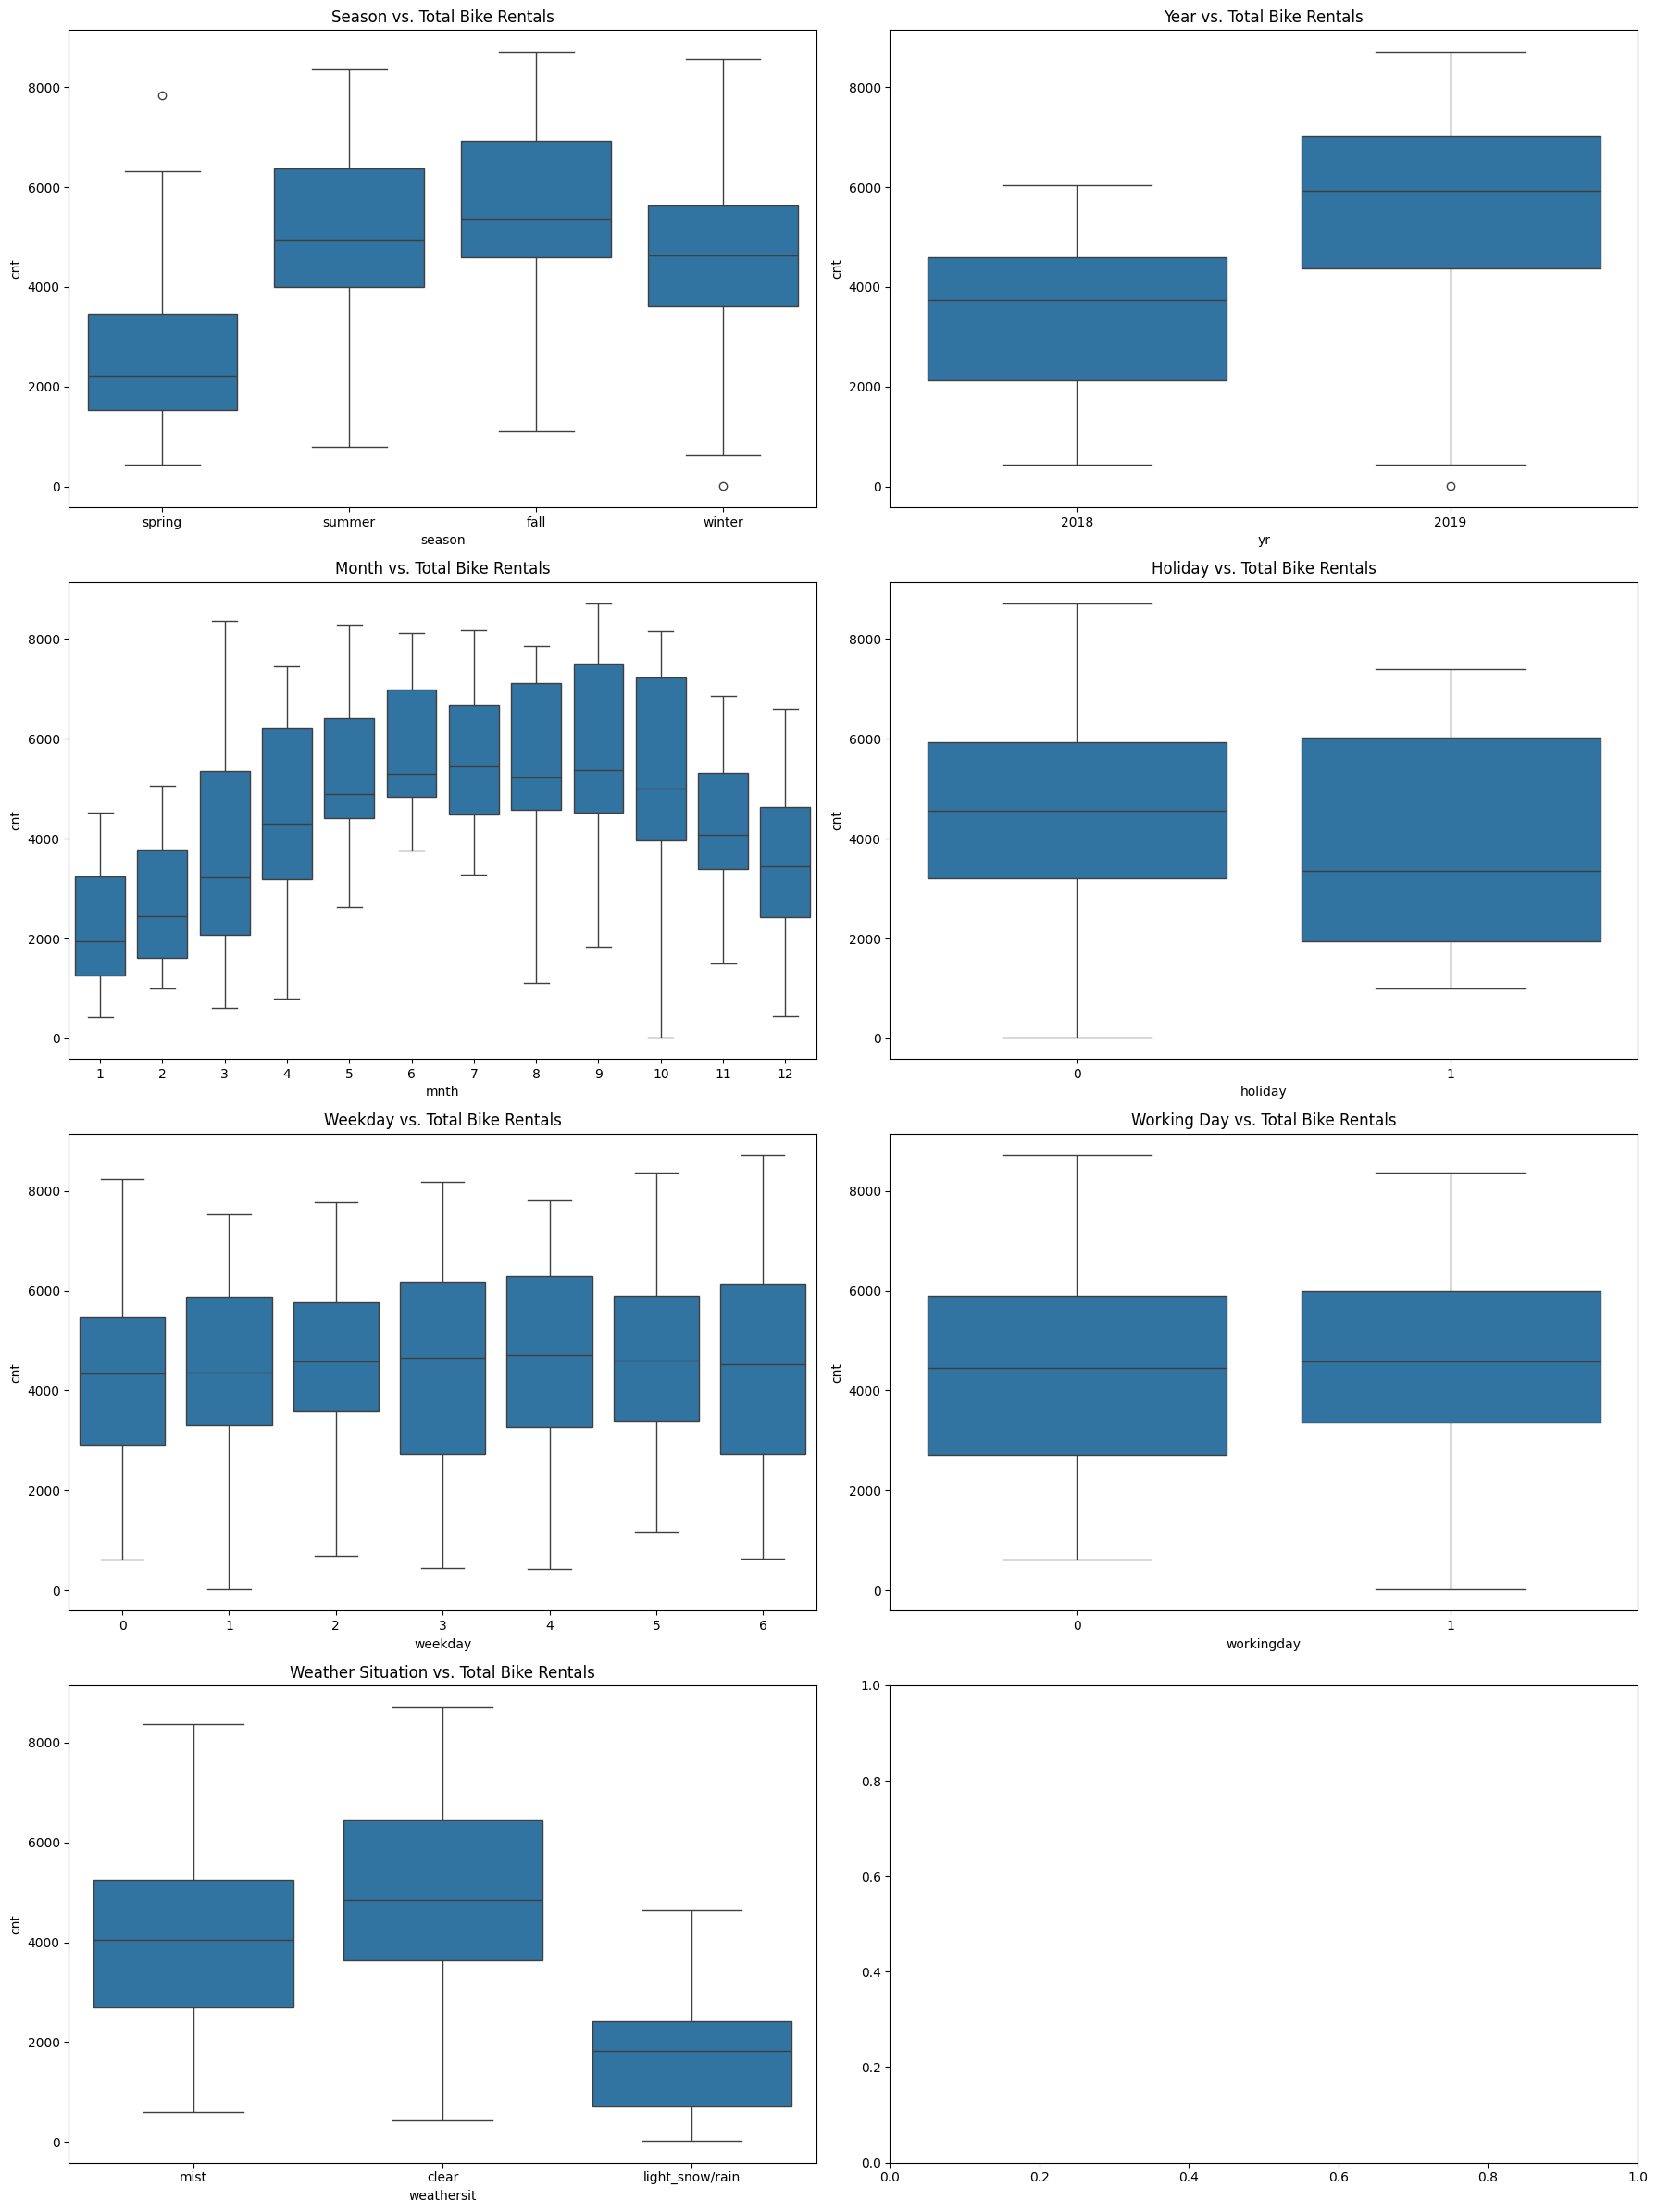

In [62]:
# Box plots to examine relationships with categorical variables
fig, axes = plt.subplots(4, 2, figsize=(18, 24))

sns.boxplot(ax=axes[0, 0], x='season', y='cnt', data=data)
axes[0, 0].set_title('Season vs. Total Bike Rentals')

sns.boxplot(ax=axes[0, 1], x='yr', y='cnt', data=data)
axes[0, 1].set_title('Year vs. Total Bike Rentals')

sns.boxplot(ax=axes[1, 0], x='mnth', y='cnt', data=data)
axes[1, 0].set_title('Month vs. Total Bike Rentals')

sns.boxplot(ax=axes[1, 1], x='holiday', y='cnt', data=data)
axes[1, 1].set_title('Holiday vs. Total Bike Rentals')

sns.boxplot(ax=axes[2, 0], x='weekday', y='cnt', data=data)
axes[2, 0].set_title('Weekday vs. Total Bike Rentals')

sns.boxplot(ax=axes[2, 1], x='workingday', y='cnt', data=data)
axes[2, 1].set_title('Working Day vs. Total Bike Rentals')

sns.boxplot(ax=axes[3, 0], x='weathersit', y='cnt', data=data)
axes[3, 0].set_title('Weather Situation vs. Total Bike Rentals')

plt.tight_layout()
plt.show()

From the box plots, we can observe the following:

- Season: The highest bike rentals are seen during the summer and fall seasons, while the lowest rentals are during winter.
- Year: There is an increase in bike rentals in 2019 compared to 2018.
- Month: Bike rentals vary by month, with peaks in the summer months.
- Holiday: There are slightly more bike rentals on non-holidays compared to holidays.
- Weekday: Bike rentals vary across weekdays, with a noticeable pattern of higher rentals on weekends.
- Working Day: There are more bike rentals on non-working days compared to working days.
- Weather Situation: Clear weather conditions have the highest bike rentals, while heavy rain/snow conditions have the lowest.

## Data Preprocessing
Let's follow these steps for data preprocessing:

- **Encode categorical variables**: Convert categorical variables into dummy/indicator variables.
- **Split the data into training and test sets**: Use an 80-20 split.
- **Scale the features**: Standardize the numerical features to ensure they have a mean of 0 and a standard deviation of 1.

Let's start with encoding the categorical variables.

In [63]:
# Encode categorical variables using one-hot encoding
data_encoded = pd.get_dummies(data, columns=['season', 'weathersit', 'mnth', 'weekday'], drop_first=True)

# Display the first few rows of the encoded dataset
data_encoded.head()

,instant,dteday,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,...,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,1,01-01-2018,2018,0,0,14.110847,18.18125,80.5833,10.749882,331,...,False,False,False,False,False,False,False,False,False,True
1,2,02-01-2018,2018,0,0,14.902598,17.68695,69.6087,16.652113,131,...,False,False,False,False,False,False,False,False,False,False
2,3,03-01-2018,2018,0,1,8.050924,9.47025,43.7273,16.636703,120,...,False,False,False,False,True,False,False,False,False,False
3,4,04-01-2018,2018,0,1,8.200000,10.60610,59.0435,10.739832,108,...,False,False,False,False,False,True,False,False,False,False
4,5,05-01-2018,2018,0,1,9.305237,11.46350,43.6957,12.522300,82,...,False,False,False,False,False,False,True,False,False,False


The categorical variables have been successfully encoded. Next, let's split the data into training and test sets.

## Splitting the Data
We'll use an 80-20 split for training and test sets.

In [64]:
from sklearn.model_selection import train_test_split

# Define the features and the target variable
X = data_encoded.drop(columns=['instant', 'dteday', 'casual', 'registered', 'cnt'])
y = data_encoded['cnt']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((584, 29), (146, 29), (584,), (146,))

The data has been successfully split into training and test sets. The training set contains 584 samples, and the test set contains 146 samples.

Next, let's scale the numerical features to ensure they have a mean of 0 and a standard deviation of 1.

## Scaling the Features
We'll use StandardScaler from sklearn.preprocessing to scale the features.

In [65]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled[:5], X_test_scaled[:5]

(array([[-1.02426696,  5.45314974, -1.43443077,  0.9418131 ,  0.89618942,
          1.09448449,  0.35214862, -0.54569018, -0.57735027, -0.58525955,
         -0.18338026,  1.38038858, -0.2819263 , -0.26381257, -0.29584333,
         -0.31264095, -0.30599503, -0.31919711, -0.2889428 ,  3.26802693,
         -0.32566947, -0.31264095, -0.28544961,  2.40638685, -0.40129017,
         -0.40129017, -0.41556078, -0.39261966, -0.40987803],
        [-1.02426696, -0.18338026,  0.69714065, -1.02924785, -0.92289684,
         -0.06306076, -1.14413107, -0.54569018, -0.57735027,  1.70864364,
         -0.18338026, -0.72443369, -0.2819263 , -0.26381257, -0.29584333,
         -0.31264095, -0.30599503, -0.31919711, -0.2889428 , -0.30599503,
         -0.32566947, -0.31264095,  3.50324525, -0.41556078, -0.40129017,
         -0.40129017, -0.41556078,  2.54699421, -0.40987803],
        [ 0.97630797, -0.18338026,  0.69714065, -0.14204378, -0.0720015 ,
          0.69593653, -0.16335958, -0.54569018, -0.57735027,  

The numerical features have been successfully scaled. Now, we can proceed with building the regression model.

## Model Building
We'll use a linear regression model to predict the total bike rentals (cnt).

In [66]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Initialize the linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test_scaled)

# Calculate the R-squared score on the test set
r2 = r2_score(y_test, y_pred)

r2

0.8568112267281139

The R-squared score of the linear regression model on the test set is approximately 0.86. This indicates that the model explains about 86% of the variance in the total bike rentals (cnt), which is a good performance.

Moving ahead, we will understand which features most influence the total bike rentals (cnt), we can examine the coefficients of the linear regression model. The magnitude and direction (positive or negative) of these coefficients will indicate the importance and nature of the relationship between each feature and the target variable.

Let's extract and visualize these coefficients.

In [67]:
# Extract the coefficients and feature names
coefficients = model.coef_
features = X.columns

# Create a DataFrame to hold feature names and their corresponding coefficients
feature_importance = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})

# Sort the DataFrame by the absolute value of the coefficients
feature_importance['Abs_Coefficient'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values(by='Abs_Coefficient', ascending=False)

# Display the feature importance
feature_importance.drop(columns=['Abs_Coefficient'])

,Feature,Coefficient
2,workingday,4.397436e+15
23,weekday_1,-3.321624e+15
26,weekday_4,-3.321624e+15
24,weekday_2,-3.239762e+15
25,weekday_3,-3.239762e+15
27,weekday_5,-3.188667e+15
1,holiday,1.662982e+15
0,yr,9.850681e+02
7,season_spring,-4.989483e+02
3,temp,4.800879e+02


The feature importance derived from the linear regression model's coefficients reveals the influence of each feature on the total bike rentals (cnt). Here are the most influential features:

- **Working Day**: Has a very large positive coefficient, indicating a strong influence.
- **Weekday (1, 2, 3, 4, 5)**: These features have large negative coefficients, indicating significant influence, with weekdays 1 to 5 having a strong negative impact.
- **Holiday**: Shows a strong positive influence.
- **Year (yr)**: Indicates an increase in bike rentals in 2019 compared to 2018.
- **Temperature (temp) and Feeling Temperature (atemp)**: Both have positive coefficients, showing that higher temperatures lead to more bike rentals.
- **Season (Spring and Winter)**: Spring has a negative influence, while winter has a positive influence.
- **Weather Situation (Light Snow/Rain, Mist)**: These have negative coefficients, indicating that worse weather conditions lead to fewer rentals.
- **Wind Speed**: Has a negative influence, suggesting that higher wind speeds reduce bike rentals.
- **Humidity**: Also shows a negative influence.

These results provide a clear indication of the factors that most significantly impact bike rentals. Understanding these factors can help the company devise strategies to optimize bike availability and increase rentals under various conditions.

## Summary of Steps
- **Data Understanding and EDA**: We explored the dataset, visualized distributions, and examined relationships between variables.
- **Data Preprocessing**: We encoded categorical variables, split the data into training and test sets, and scaled the numerical features.
- **Model Building**: We trained a linear regression model and evaluated its performance using the R-squared score.